<h2><center> CLIMATE CHANGE PROJECT</h2></center>

<figure>
<center><img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2AR_FnwONvRBRKnHxwR8WKEO9iY9nrOE0UA&usqp=CAU" width = "800" height = '500'/>

*About the problem*
> Climate 

*Objective of this challenge*
> In this challenge, your task is to develop

Summary

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Feature engineering](#Engineering)
7. [Date features EDA](#Dates)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Making predictions of the test set and creating a submission file](#Predictions)
12. [TO DOs](#Tips)

## 1. Importing libraries

In [95]:
!pip install wordcloud

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud

## 2. Loading data

In [97]:
# Loading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

#preview train data
train.head(15)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [98]:
test.head(15)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
5,RT @nycjim: Trump muzzles employees of several...,75639
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536
7,RT @climatehawk1: Indonesian farmers weather #...,569434
8,RT @guardian: British scientists face a ‘huge ...,315368
9,Aid For Agriculture | Sustainable agriculture ...,591733


In [99]:
train.shape, test.shape,

((15819, 3), (10546, 2))

## 3.Statistical Summaries

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


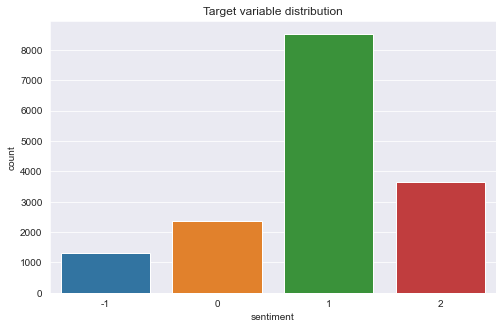

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [100]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["sentiment"])

plt.title('Target variable distribution')

plt.show()
train["sentiment"].value_counts()

## 4. Feature Engineering

*Initial cleaning  requirements*
> 1. Remove the '@' and User

For easier engineering, combine both sets of data

In [101]:
whole_data = pd.concat([train, test], ignore_index= True) #combine train and test data
whole_data

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
26361,NaN,2016: the year climate change came home: Durin...,875167
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455


>create a user function to get rid of some unwanted patterns in the tweet messages

In [102]:
whole_data.dtypes

sentiment    float64
message       object
tweetid        int64
dtype: object

In [103]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [104]:
whole_data['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
26360    RT @BrittanyBohrer: Brb, writing a poem about ...
26361    2016: the year climate change came home: Durin...
26362    RT @loop_vanuatu: Pacific countries positive a...
26363    RT @xanria_00018: You’re so hot, you must be t...
26364    RT @chloebalaoing: climate change is a global ...
Name: message, Length: 26365, dtype: object

In [105]:
x = np.vectorize(remove_pattern)(whole_data['message'], "@[\w]*") #this is some of the changes effected
x

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via ",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…',
       ...,
       'RT : Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd',
       'RT : You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove  ',
       "RT : climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h…"],
      dtype='<U611')

In [106]:
whole_data["edited messages"] = np.vectorize(remove_pattern)(whole_data['message'], "@[\w]*")
whole_data

,sentiment,message,tweetid,edited messages
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn't think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,It's not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,RT : Researchers say we have three years to ac...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT : It's 2016, and a racist, sexist, climate ..."
...,...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,"RT : Brb, writing a poem about climate change...."
26361,NaN,2016: the year climate change came home: Durin...,875167,2016: the year climate change came home: Durin...
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329,RT : Pacific countries positive about Fiji lea...
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455,"RT : You’re so hot, you must be the cause for ..."


>  numbers and special characters are not essential so we rid them

In [107]:
whole_data["edited messages"] = whole_data["edited messages"].str.replace("[^A-Za-z#]", " ")
whole_data


<ipython-input-107-6c6a14d8563e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  whole_data["edited messages"] = whole_data["edited messages"].str.replace("[^A-Za-z#]", " ")


,sentiment,message,tweetid,edited messages
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn t think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,It s not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,RT Researchers say we have three years to ac...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,RT It s and a racist sexist climate ...
...,...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,RT Brb writing a poem about climate change ...
26361,NaN,2016: the year climate change came home: Durin...,875167,the year climate change came home Durin...
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329,RT Pacific countries positive about Fiji lea...
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455,RT You re so hot you must be the cause for ...


In [108]:
whole_data["edited messages"] = whole_data["edited messages"].str.replace("RT", " ")
whole_data

,sentiment,message,tweetid,edited messages
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn t think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,It s not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,Researchers say we have three years to act...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,It s and a racist sexist climate c...
...,...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,Brb writing a poem about climate change ...
26361,NaN,2016: the year climate change came home: Durin...,875167,the year climate change came home Durin...
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329,Pacific countries positive about Fiji lead...
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455,You re so hot you must be the cause for g...


> create tweet tokens

In [114]:
tokenized_tweet = whole_data["edited messages"].apply(lambda x: x.split())
tokenized_tweet.head()

0    [PolySciMajor, EPA, chief, doesn, t, think, ca...
1    [It, s, not, like, we, lack, evidence, of, ant...
2    [Researchers, say, we, have, three, years, to,...
3    [#TodayinMaker#, WIRED, was, a, pivotal, year,...
4    [It, s, and, a, racist, sexist, climate, chang...
Name: edited messages, dtype: object

In [ ]:
0    [PolySciMajor, EPA, chief, doesn, t, think, ca...
1    [It, s, not, like, we, lack, evidence, of, ant...
2    [Researchers, say, we, have, three, year, to, ...
3    [#TodayinMaker#, WIRED, wa, a, pivotal, year, ...
4    [It, s, and, a, racist, sexist, climate, chang...
Name: edited messages, dtype: object

>stem the tweet tokens

>> PorterStemmer

In [110]:
stemmer = PorterStemmer()

In [77]:

# tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
# tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesn, t, think, ca...
1    [it, s, not, like, we, lack, evid, of, anthrop...
2    [research, say, we, have, three, year, to, act...
3    [#todayinmaker#, wire, wa, a, pivot, year, in,...
4    [it, s, and, a, racist, sexist, climat, chang,...
Name: edited messages, dtype: object

In [80]:
# for i in range(len(tokenized_tweet)):
#     tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

# whole_data["edited messages"] = tokenized_tweet
# whole_data

In [82]:
p = [text for text in whole_data["edited messages"]]
p

['polyscimajor epa chief doesn t think carbon dioxid is main caus of global warm and wait what http t co yelvcefxkc via',
 'it s not like we lack evid of anthropogen global warm',
 'research say we have three year to act on climat chang befor it s too late http t co wdt kdur f http t co z anpt',
 '#todayinmaker# wire wa a pivot year in the war on climat chang http t co wotxtlcd',
 'it s and a racist sexist climat chang deni bigot is lead in the poll #electionnight',
 'worth a read whether you do or don t believ in climat chang http t co gglzvnyjun http t co afe mah j',
 'mike penc doesn t believ in global warm or that smoke caus lung cancer http t co gvwyaauu r',
 'six big thing we can all do today to fight climat chang or how to be a climat activist http t co tymlu dbnm h',
 'my yo nephew is inconsol he want to die of old age like me but will perish in the fieri hellscap of climat chang',
 'no offens but like how do you just not believ in global warm',
 'she s think about how she s go

In [87]:
whole_data

,sentiment,message,tweetid,edited messages
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn t think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it s not like we lack evid of anthropogen glob...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,research say we have three year to act on clim...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wire wa a pivot year in the war...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,it s and a racist sexist climat chang deni big...
...,...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,brb write a poem about climat chang #climatech...
26361,NaN,2016: the year climate change came home: Durin...,875167,the year climat chang came home dure the hotte...
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329,pacif countri posit about fiji lead the global...
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455,you re so hot you must be the caus for global ...


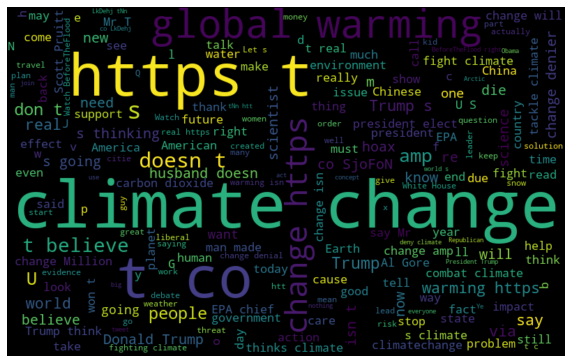

In [132]:
all_words = ' '.join([text for text in whole_data["edited messages"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

> Locate hashtagss

In [133]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [135]:
hashtag_extract(whole_data['message'])

[[],
 [],
 [],
 ['TodayinMaker'],
 ['ElectionNight'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climatemarch'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['SaveOurPlanet'],
 ['COP22', 'EarthToMarrakech'],
 [],
 ['climateÃ'],
 ['ObamaUNC'],
 [],
 [],
 ['cdnpoli'],
 [],
 ['JohnHoldren'],
 [],
 ['DemForce', 'TheResistance', 'UniteBlue'],
 [],
 [],
 [],
 ['ImVotingBecause'],
 [],
 [],
 [],
 ['qanda'],
 ['WomansMarch'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Resist', 'Impeach'],
 [],
 ['climate'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['h'],
 ['COAG'],
 [],
 [],
 [],
 ['BeforetheFlood'],
 [],
 [],
 [],
 [],
 ['airquality', 'ClimateChange', 'GreenhouseGas'],
 ['SRHPL'],
 [],
 [],
 [],
 ['climate', 'fishermen'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['EarthDay', 'MarchForScience', 'HealthAndClimate'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BeforeTheFlood'],
 ['WorldVeganDayÃ'],
 [],
 [

In [ ]:
HT_regular = hashtag_extract(whole_data['tidy_tweet'][whole_datacombi['label'] == 0])